In [1]:
# import important libraries 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [13]:
## for EMM and EMM-N fixed 
csv_path = r"/Users/Prags/Desktop/S. pombe image data/131124 AV1200 EMM and EMM-N Fixed Intenisity Series/Tif_Images/Results_Tables"

# store all the files in directory into files_list
files_list = os.listdir(csv_path)

# list of channel identifiers
channel_ids = []
for i in range(1,6):
    channel_ids.append(f'Channel{i}')
    
# dictionary for channel and combined dataframes
intensity_dict = {}
    
# loop through each intensity
for channel in channel_ids:
    
    # list of csvs for this intensity
    csvs_this_intensity = []
    dfs_this_intensity = []
    
    # loop through file list, find corresponding intensity
    for filename in files_list:
        if channel in filename:
            csvs_this_intensity.append(filename)
            dfs_this_intensity.append(pd.read_csv(os.path.join(csv_path, filename)))
            
    # concatenate dataframes for this intensity
    df_concat = pd.concat(dfs_this_intensity)
        
    # add to dictionary
    # key = channel name
    # value = concatenated dataframes
    intensity_dict[channel] = df_concat
    
    
    df_concat.to_csv(os.path.join(csv_path, f"All_{channel}.csv"))
    
print(intensity_dict['Channel3'])


         Area  Mean  Min  Max  Circ.     AR  Round  Solidity
0    1  3.368   255  255  255  0.933  1.081  0.925     0.943
1    2  3.591   255  255  255  0.926  1.234  0.810     0.940
2    3  2.347   255  255  255  0.807  1.407  0.711     0.950
3    4  3.227   255  255  255  0.901  1.345  0.744     0.940
4    5  3.568   255  255  255  0.917  1.330  0.752     0.956
..  ..    ...   ...  ...  ...    ...    ...    ...       ...
42  43  2.476   255  255  255  0.992  1.078  0.928     0.955
43  44  3.204   255  255  255  0.919  1.319  0.758     0.946
44  45  3.145   255  255  255  0.912  1.354  0.739     0.944
45  46  0.364   255  255  255  1.000  1.072  0.933     0.925
46  47  0.775   255  255  255  1.000  1.196  0.836     0.930

[553 rows x 9 columns]


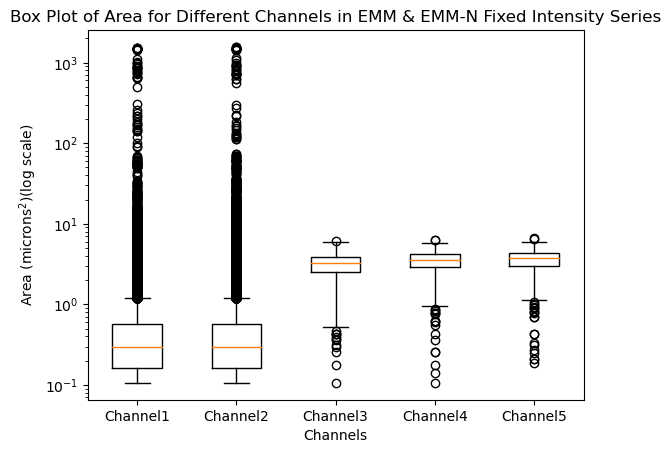

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# List to store the Area data for each channel
area_data = []
channel_labels = []

for channel, df in intensity_dict.items():
    if 'Area' in df.columns:  
        area_data.append(df['Area'])
        # Use the channel name as a label
        channel_labels.append(channel)  

# Create the box plot
plt.boxplot(area_data, labels=channel_labels)

# Add labels and title
plt.title('Box Plot of Area for Different Channels in EMM & EMM-N Fixed Intensity Series')
plt.xlabel('Channels')
plt.ylabel('Area (microns$^2$)(log scale)')
plt.yscale('log')

# Show the plot
plt.show()
